In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn as sk
import logging
import re
import matplotlib.pyplot as plt
import missingno as msno
AXE_COLONNES = 1

## Traitement des données sur l'emploi

In [2]:
sns.set(rc={'figure.figsize':(20,8.27)})

In [3]:
def separer_numero_departement(valeur):
    valeur_a_comparer = valeur.strip().lower()
    if valeur_a_comparer == "loire atlantique":
       return 44
    elif valeur_a_comparer == "alpes-maritimes":
       return 6

In [4]:
def afficher_noms_colonnes_avec_valeurs_manquantes(dataframe):
  column_labels = list(dataframe.columns)
  for column_label in column_labels:
    if dataframe[column_label].hasnans:
      print(column_label)

In [5]:
sheet_names = ['Emploi LA', 'Emploi Indus LA', 'Tertiaire marchand LA', 'Tertiaire non march LA', 'Chom LA', 'Emploi AM', 'Emploi Indus AM', 'Tertiaire march AM', 'Tertiaire non march AM OK', 'Chom AM']
dict_donnees_insee = pd.read_excel("./data/donnees_insee.xlsx", sheet_name=sheet_names, skiprows=6)
dict_donnees_insee['Tertiaire non march AM OK'] = dict_donnees_insee['Tertiaire non march AM OK'].drop(33, axis=0)
print(dict_donnees_insee.keys())

for item in dict_donnees_insee.items():
   dataframe = dict_donnees_insee[item[0]]
   dataframe = dataframe.dropna(axis=0, how="all")
   print(dataframe)
   dict_donnees_insee[item[0]] = dataframe
   #print(item[0], str(dict_donnees_insee[item[0]].shape))
dataframes = dict_donnees_insee.values()
dataset_insee = pd.concat(dataframes, axis=0,keys=sheet_names).reset_index(level=1,drop=True)
dataset_insee.insert(0,"N°_Departement",dataset_insee["Zone_geographique"].apply(separer_numero_departement))
dataset_insee = dataset_insee.drop("Zone_geographique", axis=AXE_COLONNES)
display(dataset_insee)

dict_keys(['Emploi LA', 'Emploi Indus LA', 'Tertiaire marchand LA', 'Tertiaire non march LA', 'Chom LA', 'Emploi AM', 'Emploi Indus AM', 'Tertiaire march AM', 'Tertiaire non march AM OK', 'Chom AM'])
  Zone_geographique  2001T4    2002T1    2002T2  2002T3  2002T4  2003T1   
0  Loire Atlantique  513549  519946.5  521034.5  522314  518667  519755  \

     2003T2    2003T3  2003T4  ...  2020T3  2020T4  2021T1  2021T2  2021T3   
0  521034.5  522122.5  523019  ...  608047  608497  614328  621391  626772  \

   2021T4  2022T1  2022T2  2022T3  2022T4  
0  633914  637679  640581  643603  645104  

[1 rows x 86 columns]
  Zone_geographique  2001T4    2002T1   2002T2    2002T3  2002T4  2003T1   
0  Loire Atlantique   87440  87769.75  88099.5  88429.25   86121   86567  \

   2003T2  2003T3  2003T4  ...  2020T3  2020T4   2021T1  2021T2   2021T3   
0   87013   87459   84337  ...   85414   85526  84912.5   84299  83685.5  \

   2021T4  2022T1  2022T2  2022T3  2022T4  
0   87980   87980   87980   879

,N°_Departement,2001T4,2002T1,2002T2,2002T3,2002T4,2003T1,2003T2,2003T3,2003T4,...,2020T3,2020T4,2021T1,2021T2,2021T3,2021T4,2022T1,2022T2,2022T3,2022T4
Emploi LA,44,513549.0,519946.50,521034.5,522314.00,518667,519755.0,521034.5,522122.5,523019.0,...,608047.000000,608497.0,614328.000000,621391.000000,626772.000000,633914.0,637679.000000,640581.000000,643603.000000,645104.0
Emploi Indus LA,44,87440.0,87769.75,88099.5,88429.25,86121,86567.0,87013.0,87459.0,84337.0,...,85414.000000,85526.0,84912.500000,84299.000000,83685.500000,87980.0,87980.000000,87980.000000,87980.000000,NaN
Tertiaire marchand LA,44,290834.0,288973.00,288577.0,288965.00,287697,285539.0,286943.0,284718.0,283144.0,...,257727.000000,257244.0,257796.000000,258723.000000,259970.000000,261487.0,262210.000000,263290.000000,265222.000000,266202.0
Tertiaire non march LA,44,145778.0,146213.50,146649.0,147084.50,147520,148151.5,148783.0,149414.5,150046.0,...,185481.500000,185826.0,186265.500000,186705.000000,187144.500000,187584.0,187742.213883,187742.213883,187742.213883,188216.0
Chom LA,44,6.5,6.40,6.4,6.40,6.5,6.8,6.9,6.8,7.1,...,7.800000,6.9,6.900000,6.600000,6.600000,6.1,5.900000,6.000000,6.000000,5.8
Emploi AM,6,419917.0,421377.75,422838.5,424299.25,425760,427475.5,429191.0,430906.5,432622.0,...,407882.000000,408611.0,409196.000000,415839.000000,420726.000000,426287.0,429011.000000,433844.000000,432781.000000,434185.0
Emploi Indus AM,6,35203.8,35217.40,35246.8,35118.80,34933,34890.2,34942.4,34732.0,34553.2,...,31817.800000,31909.4,32180.000000,32351.400000,32612.600000,32824.2,32973.200000,33107.400000,33271.200000,33505.0
Tertiaire march AM,6,151712.4,153507.00,153934.4,154494.00,154861.4,155220.0,156114.0,156405.2,156726.6,...,179816.000000,178286.8,179505.400000,184554.600000,187511.400000,190263.2,191832.800000,193891.600000,194276.000000,194307.0
Tertiaire non march AM OK,6,121852.0,122561.75,123271.5,123981.25,124691,125509.5,126328.0,127146.5,127965.0,...,147455.535163,148145.0,158616.043261,159007.172189,159362.130132,159910.0,NaN,NaN,NaN,NaN
Chom AM,6,10.2,10.00,9.8,9.60,9.6,9.9,10.0,9.8,10.0,...,10.100000,9.1,9.300000,9.000000,8.900000,8.4,8.300000,8.200000,8.200000,8.0


# Affichage des données manquantes sur l'emploi

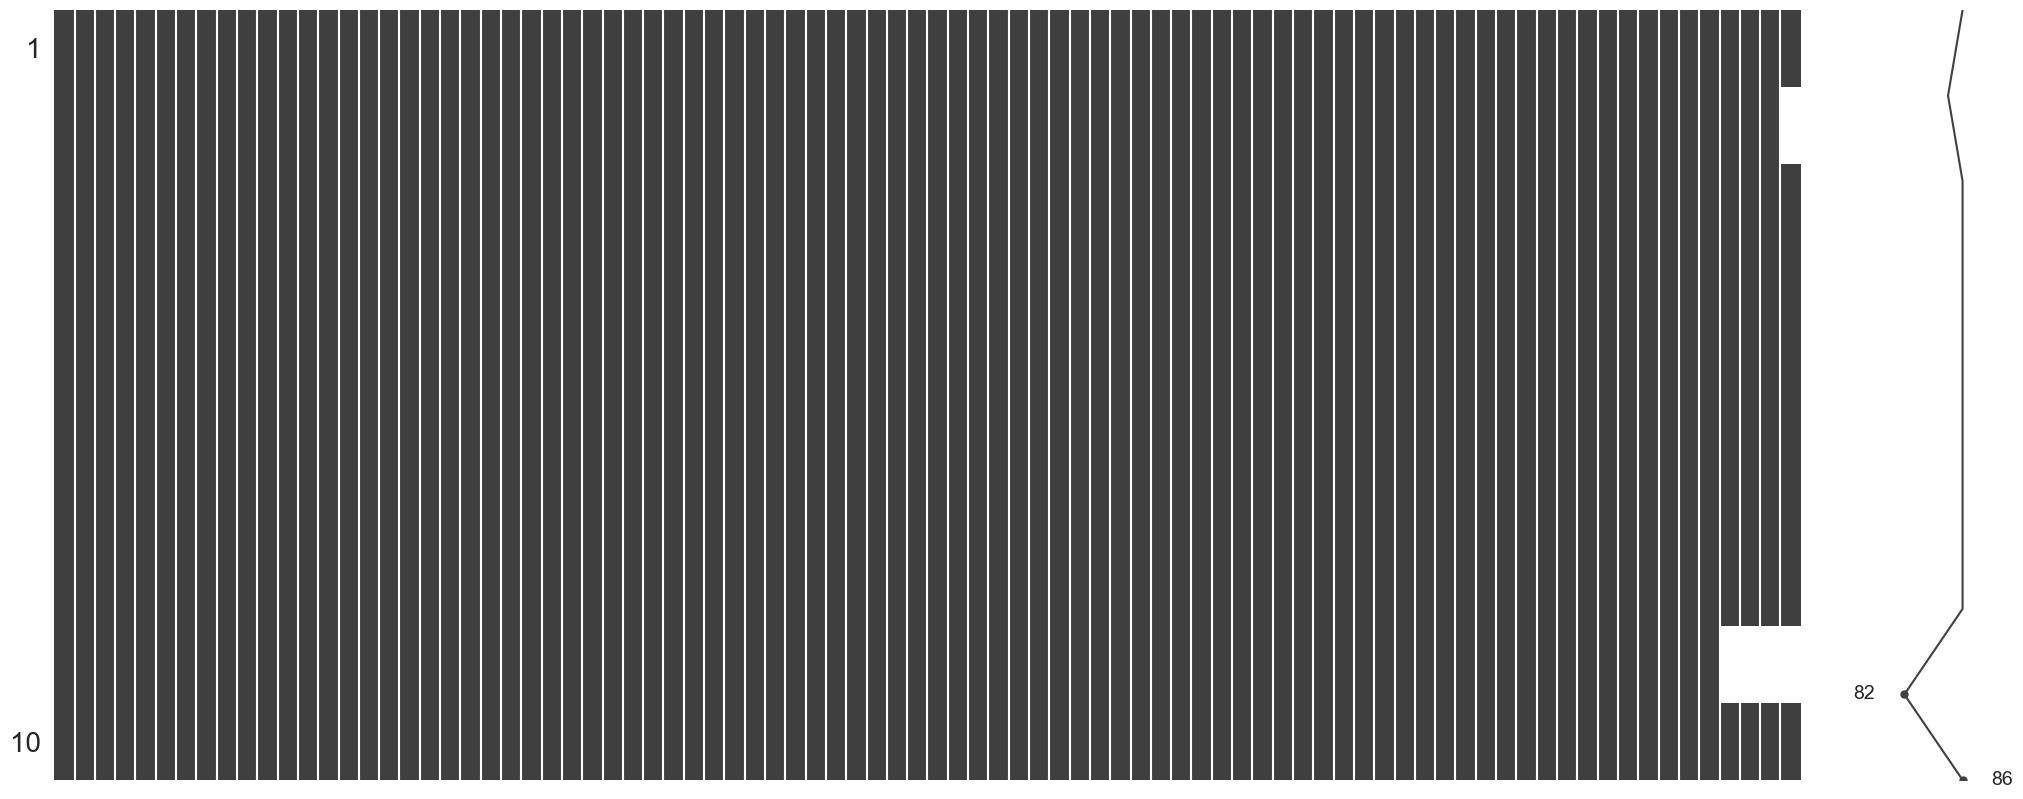

In [6]:
msno.matrix(dataset_insee)
plt.show()

In [7]:
dataset_insee_44 = dataset_insee[dataset_insee["N°_Departement"] == 44]
dataset_insee_44

,N°_Departement,2001T4,2002T1,2002T2,2002T3,2002T4,2003T1,2003T2,2003T3,2003T4,...,2020T3,2020T4,2021T1,2021T2,2021T3,2021T4,2022T1,2022T2,2022T3,2022T4
Emploi LA,44,513549.0,519946.50,521034.5,522314.00,518667,519755.0,521034.5,522122.5,523019.0,...,608047.0,608497.0,614328.0,621391.0,626772.0,633914.0,637679.000000,640581.000000,643603.000000,645104.0
Emploi Indus LA,44,87440.0,87769.75,88099.5,88429.25,86121,86567.0,87013.0,87459.0,84337.0,...,85414.0,85526.0,84912.5,84299.0,83685.5,87980.0,87980.000000,87980.000000,87980.000000,NaN
Tertiaire marchand LA,44,290834.0,288973.00,288577.0,288965.00,287697,285539.0,286943.0,284718.0,283144.0,...,257727.0,257244.0,257796.0,258723.0,259970.0,261487.0,262210.000000,263290.000000,265222.000000,266202.0
Tertiaire non march LA,44,145778.0,146213.50,146649.0,147084.50,147520,148151.5,148783.0,149414.5,150046.0,...,185481.5,185826.0,186265.5,186705.0,187144.5,187584.0,187742.213883,187742.213883,187742.213883,188216.0
Chom LA,44,6.5,6.40,6.4,6.40,6.5,6.8,6.9,6.8,7.1,...,7.8,6.9,6.9,6.6,6.6,6.1,5.900000,6.000000,6.000000,5.8


In [8]:
dataset_insee_06 = dataset_insee[dataset_insee["N°_Departement"] == 6]
dataset_insee_06

,N°_Departement,2001T4,2002T1,2002T2,2002T3,2002T4,2003T1,2003T2,2003T3,2003T4,...,2020T3,2020T4,2021T1,2021T2,2021T3,2021T4,2022T1,2022T2,2022T3,2022T4
Emploi AM,6,419917.0,421377.75,422838.5,424299.25,425760,427475.5,429191.0,430906.5,432622.0,...,407882.000000,408611.0,409196.000000,415839.000000,420726.000000,426287.0,429011.0,433844.0,432781.0,434185.0
Emploi Indus AM,6,35203.8,35217.40,35246.8,35118.80,34933,34890.2,34942.4,34732.0,34553.2,...,31817.800000,31909.4,32180.000000,32351.400000,32612.600000,32824.2,32973.2,33107.4,33271.2,33505.0
Tertiaire march AM,6,151712.4,153507.00,153934.4,154494.00,154861.4,155220.0,156114.0,156405.2,156726.6,...,179816.000000,178286.8,179505.400000,184554.600000,187511.400000,190263.2,191832.8,193891.6,194276.0,194307.0
Tertiaire non march AM OK,6,121852.0,122561.75,123271.5,123981.25,124691,125509.5,126328.0,127146.5,127965.0,...,147455.535163,148145.0,158616.043261,159007.172189,159362.130132,159910.0,NaN,NaN,NaN,NaN
Chom AM,6,10.2,10.00,9.8,9.60,9.6,9.9,10.0,9.8,10.0,...,10.100000,9.1,9.300000,9.000000,8.900000,8.4,8.3,8.2,8.2,8.0


In [9]:
chomage_LA = dataset_insee_44.loc['Chom LA'].iloc[1:]
chomage_LA

2001T4    6.5
2002T1    6.4
2002T2    6.4
2002T3    6.4
2002T4    6.5
         ... 
2021T4    6.1
2022T1    5.9
2022T2    6.0
2022T3    6.0
2022T4    5.8
Name: Chom LA, Length: 85, dtype: object

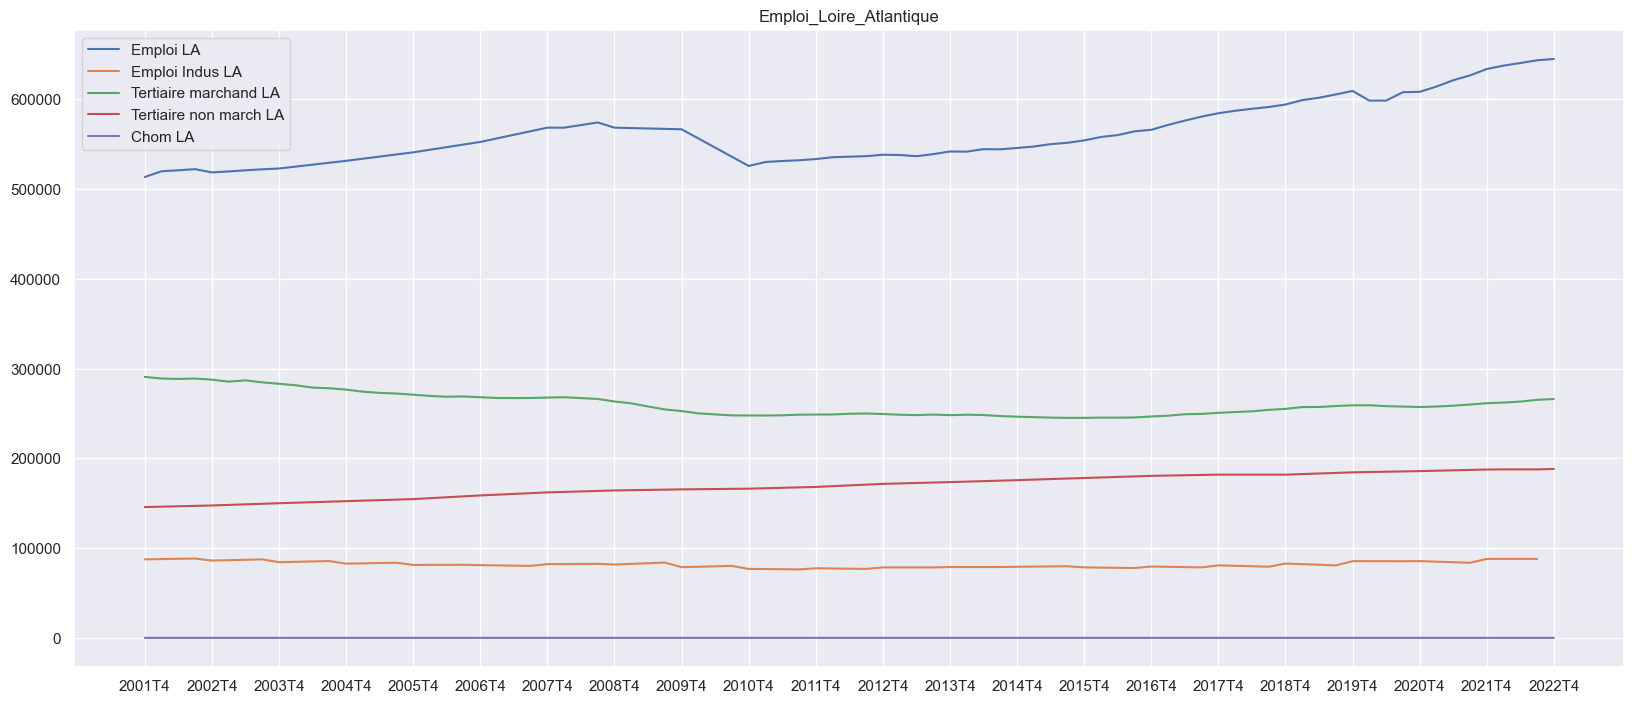

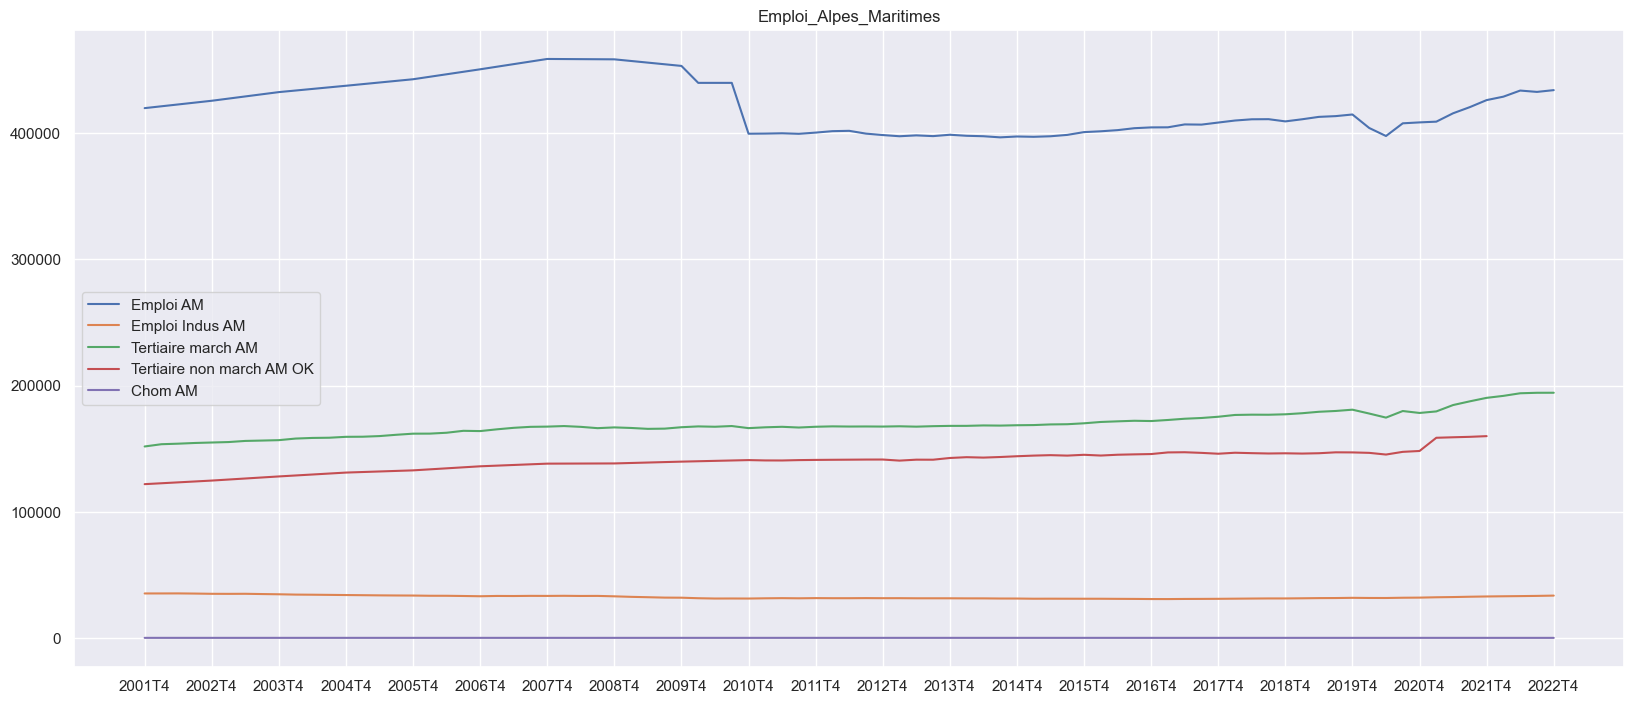

<Figure size 2000x827 with 0 Axes>

In [10]:
dataframes = [dataset_insee_44, dataset_insee_06]
x_y_axis_dataframe_slicing = slice(1,None)
ticks_labels = list(dataset_insee.filter(axis=AXE_COLONNES, regex="\d{4}T4").columns)
for i in range(len(dataframes)):
    dataframe = dataframes[i]
    departement = "Loire_Atlantique" if i == 0 else "Alpes_Maritimes"
    title = "Emploi_" + departement
    for row_label in dataframe.index:
        x = list(dataframe.columns)[x_y_axis_dataframe_slicing]
        y = dataframe.loc[row_label].iloc[x_y_axis_dataframe_slicing]
        plt.xticks(range(0,85,4),labels=ticks_labels)
        plt.plot(x,y,label=row_label)
    plt.title(title)
    plt.legend()
    plt.show()
    plt.savefig(title + ".png")

In [11]:
proportions = []
for i in range(len(dataframes)) :
    zone = "LA" if i == 0 else "AM"
    libelle_colonne_emploi = "Emploi {}".format(zone)
    libelle_colonne_num_departement = "N°_Departement"
    dataframe = dataframes[i].drop(libelle_colonne_num_departement, axis=AXE_COLONNES)
    display(afficher_noms_colonnes_avec_valeurs_manquantes(dataframe))
    libelles_lignes_emploi_et_chomage = [libelle_colonne_emploi,"Chom {}".format(zone)]
    serie_emploi_total = dataframe.loc[libelle_colonne_emploi]
    dataframe_sans_emploi_total_ni_chomage = dataframe.drop(libelles_lignes_emploi_et_chomage, axis=0)
    proportion_emploi_par_secteur = dataframe_sans_emploi_total_ni_chomage.divide(serie_emploi_total).mul(100)
    display(proportion_emploi_par_secteur)
    display(proportion_emploi_par_secteur.sum(axis=0))
    proportions.append(proportion_emploi_par_secteur)

2022T4


None

,2001T4,2002T1,2002T2,2002T3,2002T4,2003T1,2003T2,2003T3,2003T4,2004T1,...,2020T3,2020T4,2021T1,2021T2,2021T3,2021T4,2022T1,2022T2,2022T3,2022T4
Emploi Indus LA,17.026613,16.880535,16.908573,16.930285,16.604295,16.655347,16.700046,16.750667,16.125036,16.137844,...,14.047269,14.055287,13.822014,13.566177,13.351825,13.878854,13.79691,13.734407,13.669918,NaN
Tertiaire marchand LA,56.632181,55.577449,55.385392,55.324001,55.468538,54.93723,55.071785,54.530881,54.136465,53.601569,...,42.386033,42.275311,41.963902,41.636104,41.477603,41.249602,41.119435,41.10175,41.208944,41.264974
Tertiaire non march LA,28.386386,28.120874,28.145737,28.160168,28.442141,28.504103,28.555307,28.616752,28.688442,28.680402,...,30.504468,30.538524,30.320204,30.046299,29.858465,29.591396,29.441492,29.308115,29.1705,29.176071


2001T4     102.04518
2002T1    100.578858
2002T2    100.439702
2002T3    100.414454
2002T4    100.514974
             ...    
2021T4     84.719852
2022T1     84.357837
2022T2     84.144271
2022T3     84.049362
2022T4     70.441045
Length: 85, dtype: object

2022T1
2022T2
2022T3
2022T4


None

,2001T4,2002T1,2002T2,2002T3,2002T4,2003T1,2003T2,2003T3,2003T4,2004T1,...,2020T3,2020T4,2021T1,2021T2,2021T3,2021T4,2022T1,2022T2,2022T3,2022T4
Emploi Indus AM,8.383514,8.357679,8.335759,8.276894,8.204857,8.161918,8.141457,8.060217,7.986926,7.904812,...,7.800736,7.809237,7.864202,7.77979,7.751506,7.700024,7.685864,7.631176,7.687768,7.716757
Tertiaire march AM,36.12914,36.429783,36.40501,36.411566,36.372933,36.310853,36.374015,36.296784,36.227145,36.413064,...,44.085299,43.632403,43.867829,44.381263,44.568532,44.632654,44.715124,44.691548,44.890141,44.752122
Tertiaire non march AM OK,29.018115,29.085957,29.153329,29.220238,29.286687,29.36063,29.433982,29.506749,29.57894,29.669609,...,36.151518,36.255754,38.762853,38.237677,37.87789,37.512286,NaN,NaN,NaN,NaN


2001T4    73.530769
2002T1    73.873419
2002T2    73.894099
2002T3    73.908698
2002T4    73.864478
            ...    
2021T4    89.844964
2022T1    52.400987
2022T2    52.322724
2022T3    52.577909
2022T4    52.468878
Length: 85, dtype: object

In [12]:
trimestres_interessants = ["2007T2","2012T2","2017T2","2022T2"]
df_proportions_emploi_AM = proportions[1]
proportions_donnees_elections_AM = df_proportions_emploi_AM[trimestres_interessants]
proportions_donnees_elections_AM

,2007T2,2012T2,2017T2,2022T2
Emploi Indus AM,7.294463,7.822623,7.58022,7.631176
Tertiaire march AM,36.6104,41.678327,42.678106,44.691548
Tertiaire non march AM OK,30.134873,35.14279,36.153002,NaN


ValueError: cannot convert float NaN to integer

posx and posy should be finite values
posx and posy should be finite values


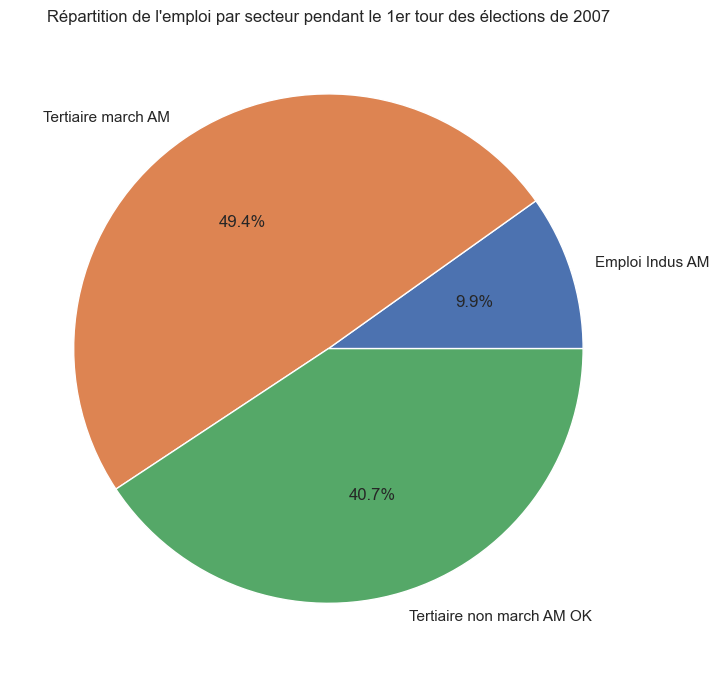

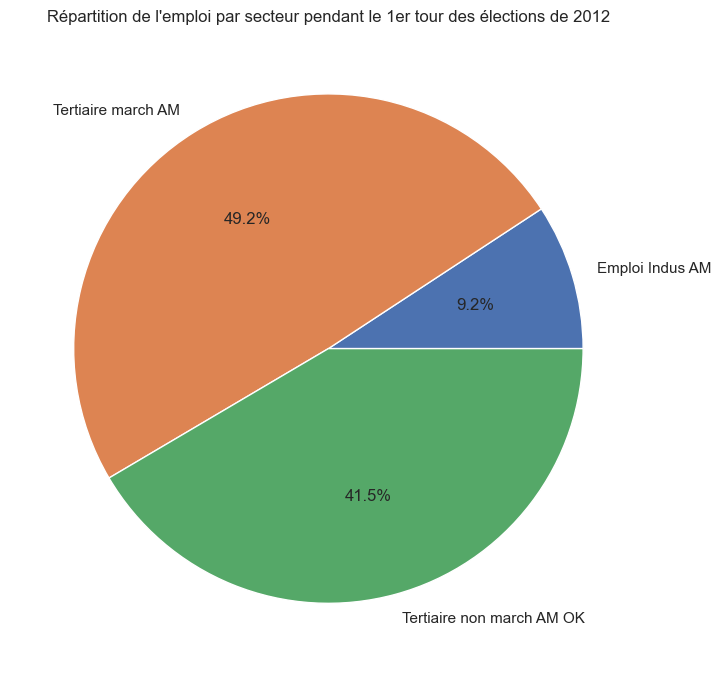

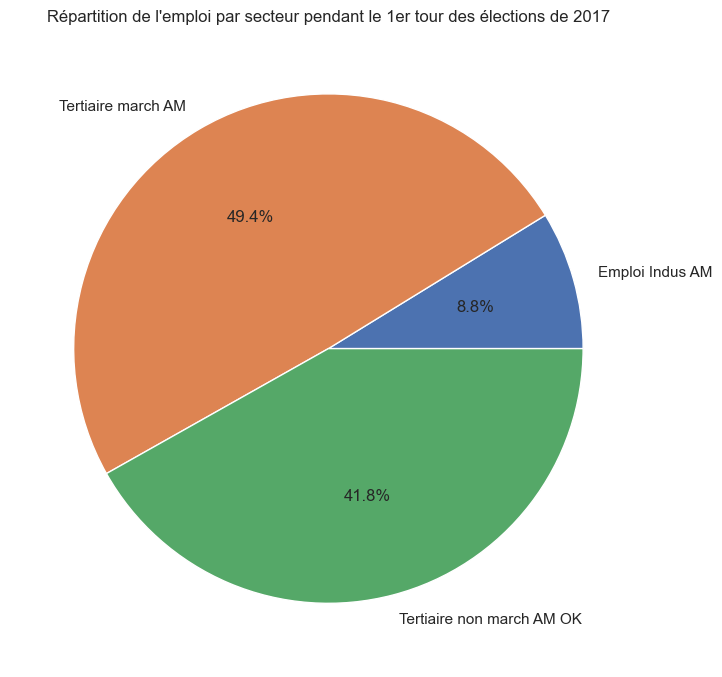

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 2000x827 with 1 Axes>

In [13]:
labels = proportions_donnees_elections_AM.index
for column in proportions_donnees_elections_AM.columns:
    fig, ax = plt.subplots()
    plt.title('Répartition de l\'emploi par secteur pendant le 1er tour des élections de {}'.format(column[0:4]))
    ax.pie(proportions_donnees_elections_AM[column], labels=labels, autopct='%1.1f%%')

## Traitement des données sur la sécurité

In [17]:
donnes_securite_dept = pd.read_csv("./data/donnee-securité.csv",
                                   sep=';')
# Filtrer les données de sécurité sur l'année 2022 et sur les départements 44 et 06
donnees_securite_44_06 = donnes_securite_dept[
 (donnes_securite_dept['Code.département'] == '6') | (donnes_securite_dept['Code.département'] == '06') | (
                donnes_securite_dept['Code.département'] == '44')]

nb_faits_par_departements = donnees_securite_2022_44_06.groupby('Code.département').sum()['faits']

donnees_securite_44_06



,classe,annee,Code.département,Code.région,unité.de.compte,millPOP,millLOG,faits,POP,LOG,tauxpourmille
5,Coups et blessures volontaires,16,6,93,victime,16,16,4804,1083704,"761857,023282979","4,43294478935207"
44,Coups et blessures volontaires,16,44,52,victime,16,16,3924,1380852,"729713,912222526","2,84172380530281"
106,Coups et blessures volontaires,17,6,93,victime,17,17,4573,1083310,"766747,524813269","4,22132169000563"
145,Coups et blessures volontaires,17,44,52,victime,17,17,4249,1394909,"740924,187780818","3,04607684085485"
207,Coups et blessures volontaires,18,6,93,victime,18,18,4992,1086219,"772316,51330812","4,59575831393117"
...,...,...,...,...,...,...,...,...,...,...,...
8225,Destructions et dégradations volontaires,20,44,52,infraction,20,19,11099,1445171,"764010,312166239","7,68006000673969"
8287,Destructions et dégradations volontaires,21,6,93,infraction,20,19,10736,1097410,"778290,897542165","9,78303459964826"
8326,Destructions et dégradations volontaires,21,44,52,infraction,20,19,11463,1445171,"764010,312166239","7,9319333144659"
8388,Destructions et dégradations volontaires,22,6,93,infraction,20,19,10514,1097410,"778290,897542165","9,58074010625017"
